# Week9 Unsupervised Learning

In week 9, we've covered:

* **Clustering**

In this notebook, we will work on an Online Retail dataset to explore customer segmentation through the unsupervised learning method, and apply association rule mining approach to find interesting rules and patterns in this transaction database. 

The dataset for this project contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. This dataset contains following information:

* InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions * were performed in a single invoice (multiple purchases).
* StockCode: Identifier for items contained in an invoice.
* Description: Textual description of each of the stock item.
* Quantity: The quantity of the item purchased.
* InvoiceDate: Date of purchase.
* UnitPrice: Value of each item.
* CustomerID: Identifier for customer making the purchase.
* Country: Country of customer.

Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a TODO statement.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week9_Unsupervised_Learning_Homework.ipynb** notebook to your local folder and open it with Jupyter Notebook.


### Data Loading and EDA

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [1]:
# TODO
# Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Load Data

In [27]:
# TODO
df = pd.read_excel("./Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


EDA

In [3]:
# TODO: Print dimensions of the dataset
df.shape

(541909, 8)

In [4]:
# TODO: Print statistical summary of all numerical attributes
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
# TODO: Check for missing values
df.isnull().values.any()

True

In [30]:
# TODO: Disregard any records without customer id
clean = df[df['CustomerID'].notna()]
print("Original Size",len(df))
print("After removing nan Customer ID",  len(clean))

Original Size 541909
After removing nan Customer ID 406829


In [31]:
# TODO: Remove all records in that quantity or unit price is negative
clean = clean[(clean['Quantity']>=0) & (clean['UnitPrice']>=0)]
print("After removing Quantity and UnitPrice <0",  len(clean))

After removing Quantity and UnitPrice <0 397924


In [33]:
clean.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [41]:
# TODO: Add a column to show the total sales amount for each line of transaction record
# Each invoice would make a transaction, we can aggregate with InvoiceNo
clean[['InvoiceNo', 'UnitPrice', 'CustomerID']].groupby(['InvoiceNo','CustomerID']).sum()


,,UnitPrice
InvoiceNo,CustomerID,
536365,17850.0,27.37
536366,17850.0,3.70
536367,13047.0,58.24
536368,13047.0,19.10
536369,13047.0,5.95
...,...,...
581583,13777.0,3.30
581584,13777.0,2.57
581585,15804.0,37.78


Show top 10 customers based on the total sales amount

In [52]:
# TODO
customer_sales = clean[['UnitPrice', 'CustomerID']].groupby(['CustomerID']).sum().sort_values('UnitPrice',ascending=False)
customer_sales.columns = ['Total Purchased']
customer_sales.head(10)


,Total Purchased
CustomerID,
14096.0,33332.45
14911.0,26185.72
17841.0,19848.49
12744.0,12949.99
12748.0,12205.60
12536.0,9070.93
16029.0,8722.39
14606.0,7595.75
15311.0,5961.86


Use bar plot to show top 10 products based on the total sales amount

In [84]:
# TODO
porduct_sales = clean[['UnitPrice', 'StockCode', 'Description']].groupby(['StockCode', 'Description']).sum().sort_values('UnitPrice',ascending=False)
top_10_sales = porduct_sales.head(10)
top_10_sales

,,UnitPrice
StockCode,Description,
M,Manual,49782.81
POST,POSTAGE,34695.96
22423,REGENCY CAKESTAND 3 TIER,21508.90
DOT,DOTCOM POSTAGE,11906.36
47566,PARTY BUNTING,6807.42
C2,CARRIAGE,6668.00
85123A,WHITE HANGING HEART T-LIGHT HOLDER,5867.22
85066,CREAM SWEETHEART MINI CHEST,5755.06
22720,SET OF 3 CAKE TINS PANTRY DESIGN,5741.24


In [147]:
def add_labels(x,y, delta=5000, rotation=90):
    for i in range(len(x)):
        plt.text(i, y[i]+delta, "${:0,.2f}".format(y[i]), ha = 'center', rotation=rotation)

/var/folders/zj/qbh81wyd36s5xgr4pxwy71k80000gq/T/ipykernel_68819/4168088948.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 90)


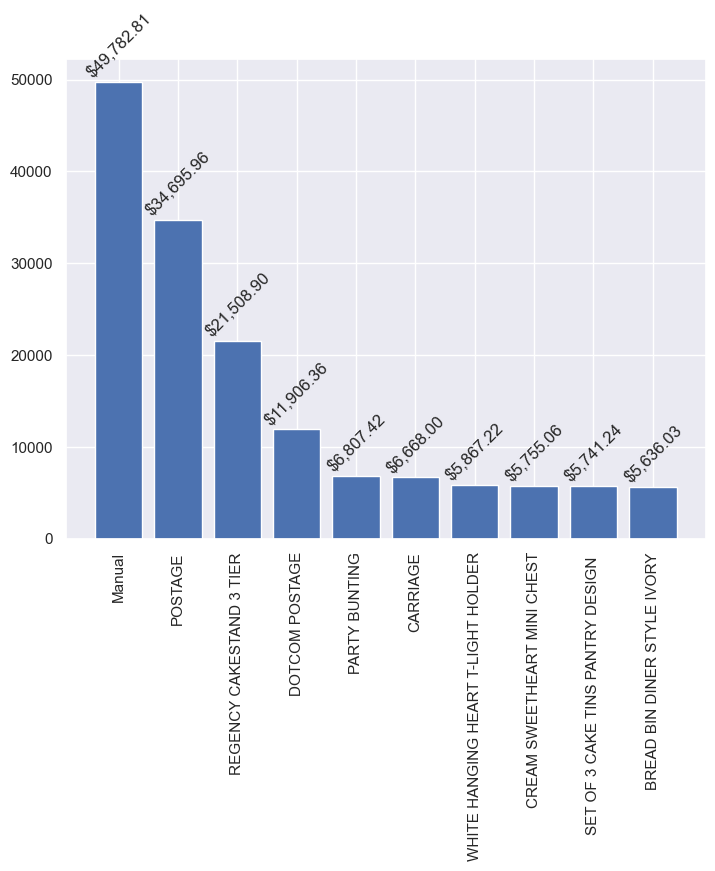

In [148]:
names = [i[1] for i in top_10_sales.index]
values = [i[0] for i in top_10_sales.values]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
add_labels(names, values, 500, 45)
ax.bar(names, values)
ax.set_xticklabels(names, rotation = 90)
plt.show()

Use bar plot to show when (which month) we generate most revenue in a year

In [123]:
# TODO
def split_date(date):
    split = str(date).split('-')
    year = split[0]
    month = split[1]
    day = split[2]
    return year, month, day.split(" ")[0]
clean[['year', 'month', 'day']] = [split_date(date) for date in clean['InvoiceDate']]
clean['year-month'] = clean['year'] + '-'+clean['month']

In [126]:
clean['year-month'].value_counts()

2011-11    64545
2011-10    49557
2011-09    40030
2011-05    28322
2011-06    27185
2011-03    27177
2011-08    27013
2011-07    26827
2010-12    26160
2011-04    22644
2011-01    21232
2011-02    19928
2011-12    17304
Name: year-month, dtype: int64

In [125]:

monthly_sales = clean[['UnitPrice', 'year-month']].groupby(['year-month']).sum().sort_values('year-month',ascending=True)
monthly_sales

,UnitPrice
year-month,
2010-12,81935.610
2011-01,66964.990
2011-02,63185.760
2011-03,88563.100
2011-04,79005.481
2011-05,102128.280
2011-06,85274.730
2011-07,75919.901
2011-08,79423.830


[66964.99, 130150.75, 218713.85, 297719.331, 399847.61100000003, 485122.341, 561042.242, 640466.0719999999, 759519.134, 925369.114, 1110891.574, 1158065.004]


/var/folders/zj/qbh81wyd36s5xgr4pxwy71k80000gq/T/ipykernel_68819/676626809.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 90)


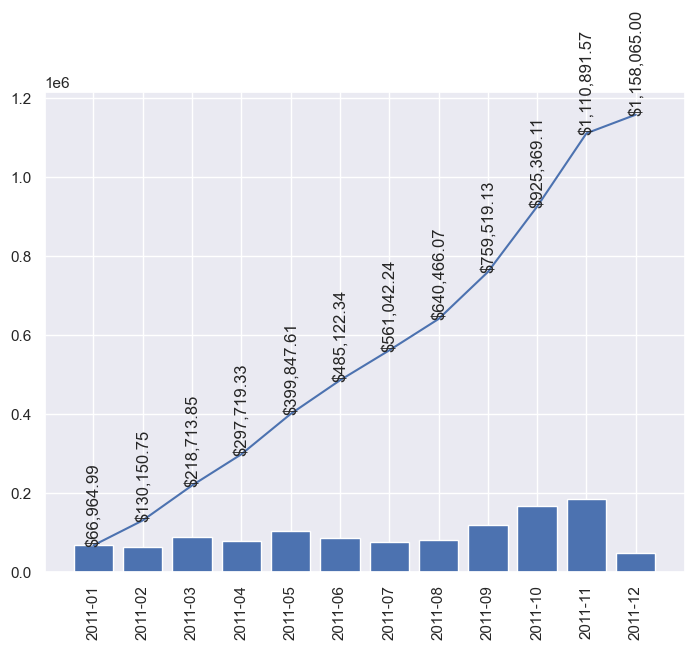

In [157]:
names = [i for i in monthly_sales.index]
values = [i[0] for i in monthly_sales.values]
names = names[1:]
values = values[1:]
aggregated = []
total_sum =0
for i in values:
    total_sum = total_sum+i
    aggregated.append(total_sum)
print(aggregated)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(names,aggregated)
ax.bar(names, values)
add_labels(names, aggregated,rotation=90)
ax.set_xticklabels(names, rotation = 90)
plt.show()

Towards the end of the year, sales make a huge jump to over a million.

### Data Preprocessing

Once we have created our customer transaction dataset, we will perform some preprocessing on the data. 

In this practice, we would like to leverage RFM analysis to explore customer segmentation. RFM analysis depends
on Recency (R), Frequency (F), and Monetary (M) measures which are three important
purchase-related variables that influence the future purchase possibilities of the customers. 

* R -- How long has it been since the customer’s last purchase?
* F -- How often has the customer made a purchase over a defined period of time?
* M -- How much money has the customer spend with us over a defined period of time?

In [158]:
from datetime import timedelta

In [163]:
# Assuming your dataset is named as df
# --Group data by customerID--
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)
# Grouping by CustomerID
df_process = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'})
# Rename the columns 
df_process.rename(columns={'InvoiceDate': 'Recency',
                           'InvoiceNo': 'Frequency',
                           'UnitPrice': 'Monetary'}, inplace=True)

2011-12-10 12:50:00


In [162]:
df_process

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,2.08
12347.0,2,182,481.21
12348.0,75,31,178.71
12349.0,19,73,605.10
12350.0,310,17,65.30
...,...,...,...
18280.0,278,10,47.65
18281.0,181,7,39.36
18282.0,8,13,62.68


For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This problem is particularly noticeable for the monetary amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

Apply log transformation and StandardScaler

In [169]:
# Todo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_process)
scaled = scaler.transform(df_process)
scaled


array([[ 2.32202285, -0.3917197 , -0.2490419 ],
       [-0.89373323,  0.38265697,  0.12392752],
       [-0.1691956 , -0.26695902, -0.11154771],
       ...,
       [-0.83418219, -0.34439668, -0.20186901],
       [-0.87388289,  2.85205812,  0.69974815],
       [-0.48680114, -0.0991774 , -0.16927612]])

### K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method and the Silhouette method.

#### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

In [173]:
# TODO
from sklearn.cluster import KMeans

ks = [i for i in range(1,10)]
intertias =[]
for k in range(1,10):
    k_means = KMeans(n_clusters=k).fit(scaled)
    intertias.append(k_means.inertia_)

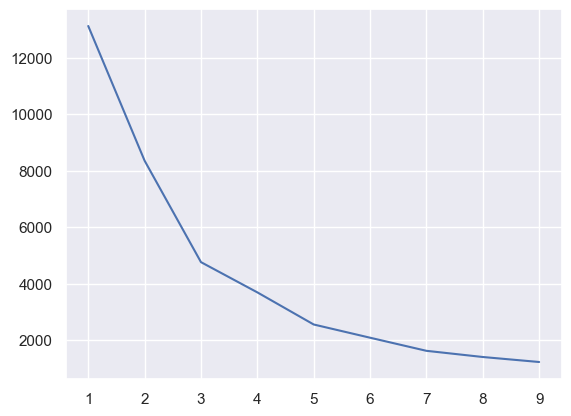

In [175]:
plt.plot(ks, intertias)

In [177]:
# Re K should be 3 -7

array([1, 2, 2, ..., 2, 2, 2], dtype=int32)

#### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap.

In [181]:
from sklearn.metrics import silhouette_score

In [186]:
# TODO
ks = [i for i in range(2,10)]
silhouette_scores =[]
for k in range(2,10):
    k_means = KMeans(n_clusters=k).fit(scaled)
    silhouette_scores.append(silhouette_score(scaled, k_means.labels_))

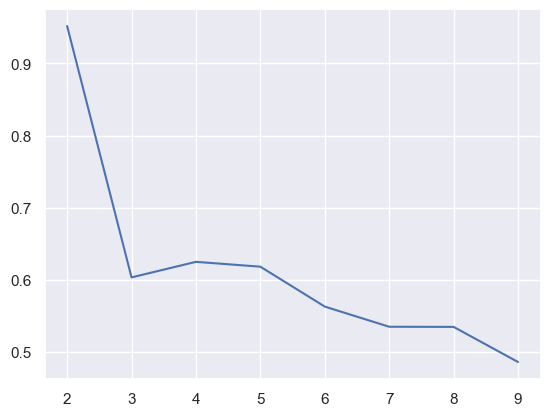

In [191]:
plt.plot(ks, silhouette_scores)

In [189]:
#Just exploring
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
bandwidth_x = estimate_bandwidth(scaled, quantile=0.1, n_samples=len(scaled))
meanshift_model = MeanShift(bandwidth=bandwidth_x, bin_seeding=True)
meanshift_model.fit(scaled)
meanshift_model.cluster_centers_

MeanShift(bandwidth=0.48072315661527715, bin_seeding=True)

### Optional
#### Visualization of Clusters using PCA

<div class="span12 alert alert-info">
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components (label them x and y)
<li> Choose a value of K from above and use KMeans to cluster using the two PCA components (x and y)
<li> Create a data frame with the following fields:
  <ul>
  <li> customer id
  <li> cluster id 
  <li> PCA component x
  <li> PCA component y    
  </ul>
<li> Plot a scatterplot of the x vs y columns and color-code points differently based on cluster ID
<li> How do the clusters look? 

</div>

In [246]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [255]:
pca.components_

array([[-0.29277623,  0.68585189,  0.66625015],
       [ 0.95053381,  0.13314664,  0.28063758]])

In [256]:
pca.explained_variance_

array([1.74110953, 0.93802831])

In [263]:
pca.explained_variance_ratio_

array([0.5802371 , 0.31260459])

In [264]:
pca_data = pca.transform(scaled) # Getting in two dimensions

In [265]:
k_means = KMeans(n_clusters=3).fit(pca_data) 
clusters = k_means.predict(pca_data) # Getting the cluster IDS

In [266]:
pca_df = pd.DataFrame([[customer,cluster,'b' if cluster ==0 else 'r' if cluster==1 else'g', x[0], x[1] ]for customer,x, cluster in zip(df_process.index, pca_data, clusters)], columns=['CustomerID','ClusterID','ClusterColor', 'pca_x', 'pca_y'])

In [267]:
pca_df['ClusterID'].value_counts()

1    3272
0    1092
2       8
Name: ClusterID, dtype: int64

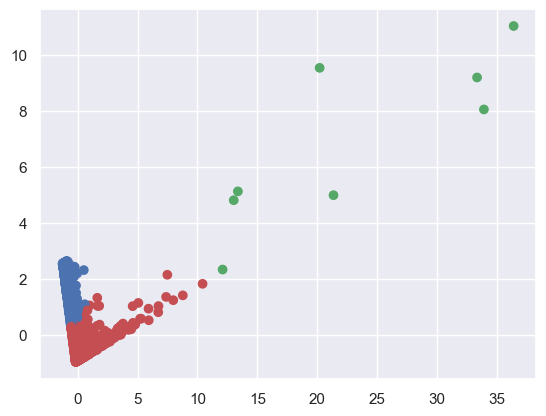

In [268]:
plt.scatter(pca_df['pca_x'], pca_df['pca_y'], c=pca_df['ClusterColor'])

## Submission

Commit your completed **Week9_Unsupervised_Learning_Homework.ipynb** notebook to your personal Github repo you shared with the faculty.